In [1]:
!pip install pytrends

In [2]:
pip install pytrends --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install yfinance

In [4]:
import yfinance as yf

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from pytrends.request import TrendReq

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn import metrics

In [7]:
pytrends = TrendReq(hl='en-US', tz=360)
pytrends.suggestions(keyword='bitcoin')

[{'mid': '/m/05p0rrx', 'title': 'Bitcoin', 'type': 'Cryptocurrency'},
 {'mid': '/g/11fzz0b6bd',
  'title': 'The Bitcoin Standard: The Decentralized Alternative to Central Banking',
  'type': 'Book by Saifedean Ammous'},
 {'mid': '/g/11g24jzg8x',
  'title': 'Cryptocurrency Investing For Dummies',
  'type': 'Book by Kiana Danial'},
 {'mid': '/g/11fx8y_lzq',
  'title': 'Mastering Bitcoin: Programming the Open Blockchain',
  'type': 'Book by Andreas Antonopoulos'},
 {'mid': '/g/11h2fx5fh8',
  'title': 'Bitcoin: A Peer-to-Peer Electronic Cash System',
  'type': 'Book by Satoshi Nakamoto'}]

In [8]:
kw_list = ['bitcoin','binance','coinbase']
cat = 0
geo = ''
timeframe = '2020-01-01 2021-10-01'

,bitcoin,binance,coinbase
geoName,,,
Afghanistan,0,0,0
Albania,0,0,0
Algeria,0,0,0
American Samoa,0,0,0
Andorra,0,0,0
...,...,...,...
Western Sahara,0,0,0
Yemen,0,0,0
Zambia,0,0,0


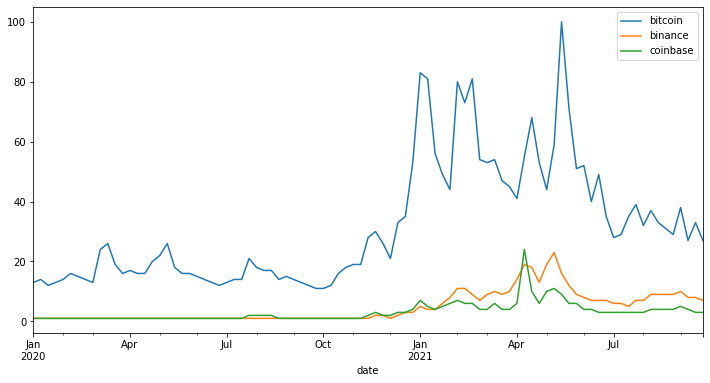

In [9]:
pytrends.build_payload(kw_list, cat=cat, timeframe=timeframe, geo=geo, gprop='')
data = pytrends.interest_over_time()
%matplotlib inline

data.plot(figsize = (12,6))

app = pytrends.interest_by_region(resolution='COUNTRY')
app

In [10]:
data

,bitcoin,binance,coinbase,isPartial
date,,,,
2020-01-05,13,1,1,False
2020-01-12,14,1,1,False
2020-01-19,12,1,1,False
2020-01-26,13,1,1,False
2020-02-02,14,1,1,False
...,...,...,...,...
2021-08-29,29,9,4,False
2021-09-05,38,10,5,False
2021-09-12,27,8,4,False


In [11]:
price = yf.download('BTC-USD', start='2020-01-01', end='2021-10-01', interval='1wk')

[*********************100%***********************]  1 of 1 completed


In [12]:
df_price = price['Adj Close']

In [13]:
df_price = df_price[1:]

In [14]:
ret = df_price.pct_change()

In [15]:
ret = ret[1:]

In [16]:
data.iloc[:,:-1]

,bitcoin,binance,coinbase
date,,,
2020-01-05,13,1,1
2020-01-12,14,1,1
2020-01-19,12,1,1
2020-01-26,13,1,1
2020-02-02,14,1,1
...,...,...,...
2021-08-29,29,9,4
2021-09-05,38,10,5
2021-09-12,27,8,4


In [17]:
X = data.iloc[1:,:-1]
y = ret

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [20]:
X_train

,bitcoin,binance,coinbase
date,,,
2021-07-11,29,6,3
2021-02-21,81,9,6
2021-04-04,41,14,6
2020-11-08,19,1,1
2021-05-30,51,9,6
...,...,...,...
2020-02-02,14,1,1
2020-01-26,13,1,1
2020-02-23,14,1,1


In [21]:
model = LinearRegression()

In [22]:
reg = model.fit(X_train, y_train)

In [24]:
y_pred = model.predict(X_test)

In [25]:
print('Score = ', metrics.r2_score(y_test,y_pred))

Score =  -0.05512402871519528


In [29]:
print("MAE = ",  metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",  metrics.mean_squared_error(y_test,y_pred))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE =  0.08847894244060538
MSE =  0.015215659752185244
RMSE =  0.12335177239174654


In [26]:
m = model.coef_
b = model.intercept_

In [27]:
m

array([ 0.00067676, -0.00861181,  0.00360972])

In [28]:
b

0.03701257604392831

In [30]:
df_report = pd.DataFrame({'Actually': y_test, 'Predicted':y_pred})

In [31]:
df_report

,Actually,Predicted
Date,,
2020-08-19,-0.052130,0.047125
2021-04-21,-0.025497,-0.035883
2021-04-14,-0.110709,-0.002756
2020-06-10,-0.026305,0.042162
2021-07-28,-0.031821,0.013953
2020-03-11,-0.339342,0.048253
2020-10-07,0.077467,0.039455
2020-12-09,0.059818,0.049832
2020-04-22,0.134694,0.042839


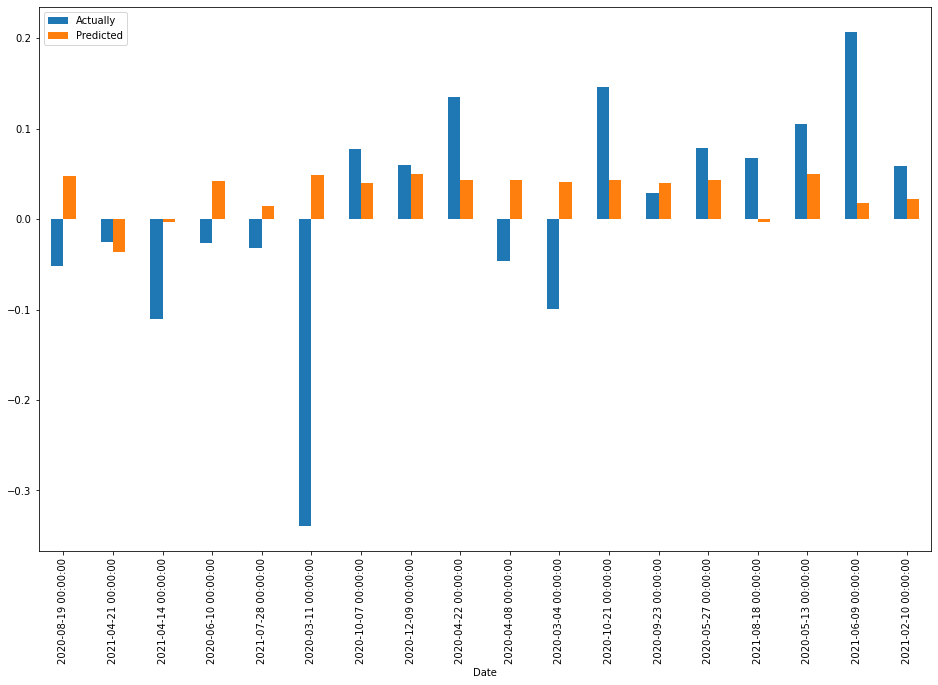

In [32]:
df1 = df_report.head(20)
df1.plot(kind="bar",figsize=(16,10))
plt.show()